<a href="https://www.kaggle.com/code/hashemi221022/prediction-of-diabetes-with-gaussian-naive-bayes?scriptVersionId=149138926" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# import dataset

In [2]:
# read dataset
data = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# remove Pregnancies column and convert to dataframe

In [3]:
# create dataframe
df = pd.DataFrame(data.drop('Pregnancies', axis=1))
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# Check the information in the database

In [4]:
# geting describe
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


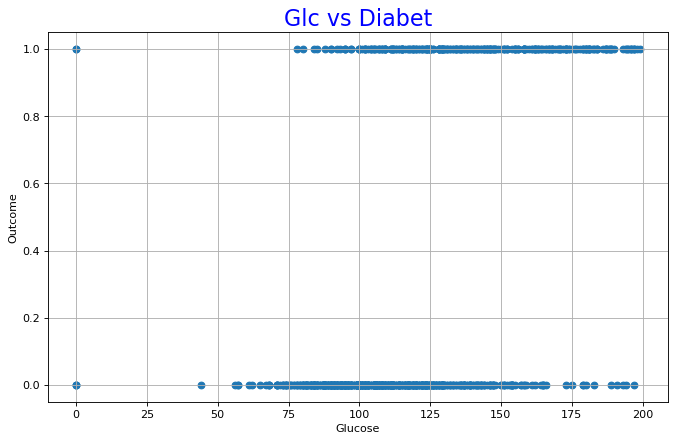

In [5]:
# Drawing plot 
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.grid()
plt.title('Glc vs Diabet', fontsize=20, color='b')
plt.show()

# Remove noises

In [6]:
# Find noises
df_N = df[df['Glucose']< 25]
df_N


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


In [7]:
# Show smallest value
df.nsmallest(10, columns='Glucose')


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1
62,44,62,0,0,25.0,0.587,36,0
680,56,56,28,45,24.2,0.332,22,0
146,57,80,37,0,32.8,0.096,41,0
537,57,60,0,0,21.7,0.735,67,0
352,61,82,28,0,34.4,0.243,46,0


In [8]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [9]:
# Drop the noises
df.drop(df.index[[75, 182, 342, 349, 502]], inplace=True)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


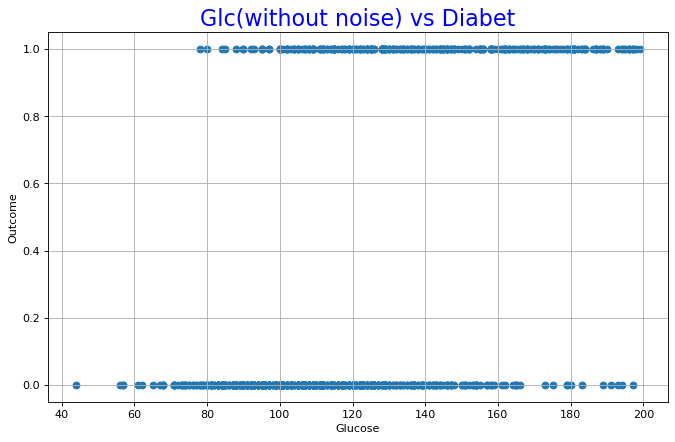

In [10]:
# Drawing plot
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.grid()
plt.title('Glc(without noise) vs Diabet', fontsize=20, color='b')
plt.show()

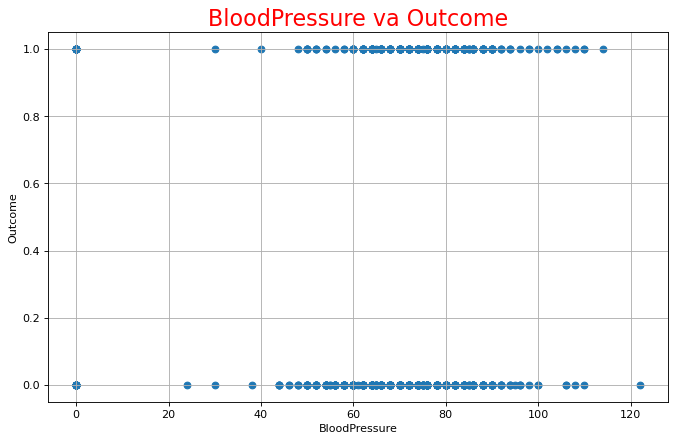

In [11]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['BloodPressure'], df['Outcome'])
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.grid()
plt.title('BloodPressure va Outcome', fontsize=20, color='r')
plt.show()

In [12]:
df_N2= df[df['BloodPressure']< 20]
df_N2


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,115,0,0,0,35.3,0.134,29,0
15,100,0,0,0,30.0,0.484,32,1
49,105,0,0,0,0.0,0.305,24,0
60,84,0,0,0,0.0,0.304,21,0
78,131,0,0,0,43.2,0.270,26,1
81,74,0,0,0,0.0,0.102,22,0
172,87,0,23,0,28.9,0.773,25,0
193,135,0,0,0,52.3,0.578,40,1
222,119,0,0,0,25.2,0.209,37,0
261,141,0,0,0,30.0,0.761,27,1


In [13]:
print(len(df_N2))

35


In [14]:
# Drop
df.drop(df.nsmallest(35, columns='BloodPressure').index, inplace=True)

In [15]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


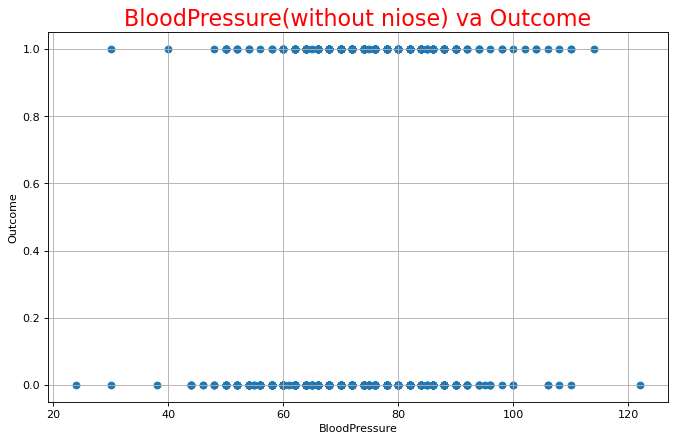

In [16]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['BloodPressure'], df['Outcome'])
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.grid()
plt.title('BloodPressure(without niose) va Outcome', fontsize=20, color='r')
plt.show()

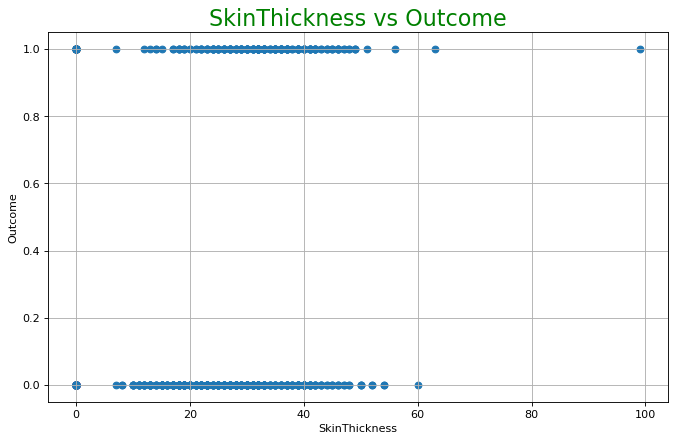

In [17]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['SkinThickness'], df['Outcome'])
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.grid()
plt.title('SkinThickness vs Outcome', fontsize=20, color='g')
plt.show()

In [18]:
# Find
df_N3 = df[df['SkinThickness']== 0]
df_N3

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,183,64,0,0,23.3,0.672,32,1
5,116,74,0,0,25.6,0.201,30,0
9,125,96,0,0,0.0,0.232,54,1
10,110,92,0,0,37.6,0.191,30,0
11,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...
757,123,72,0,0,36.3,0.258,52,1
758,106,76,0,0,37.5,0.197,26,0
759,190,92,0,0,35.5,0.278,66,1
762,89,62,0,0,22.5,0.142,33,0


In [19]:
print(len(df_N3))

194


In [20]:
df.nsmallest(195, columns='SkinThickness')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,183,64,0,0,23.3,0.672,32,1
5,116,74,0,0,25.6,0.201,30,0
9,125,96,0,0,0.0,0.232,54,1
10,110,92,0,0,37.6,0.191,30,0
11,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...
758,106,76,0,0,37.5,0.197,26,0
759,190,92,0,0,35.5,0.278,66,1
762,89,62,0,0,22.5,0.142,33,0
766,126,60,0,0,30.1,0.349,47,1


In [21]:
df.drop(df.nsmallest(194, columns='SkinThickness').index, inplace=True)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,43,1
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0


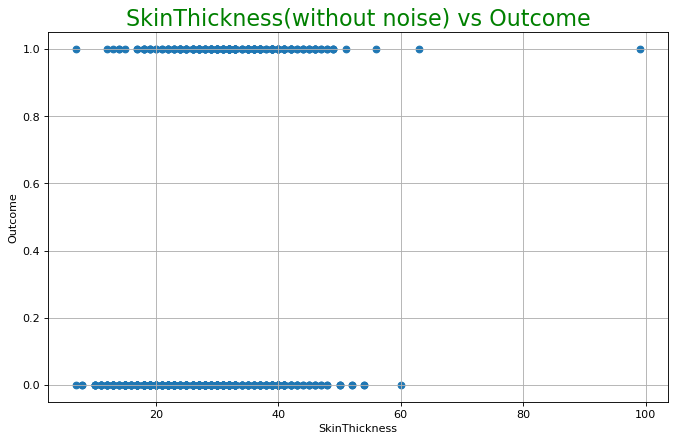

In [22]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['SkinThickness'], df['Outcome'])
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.grid()
plt.title('SkinThickness(without noise) vs Outcome', fontsize=20, color='g')
plt.show()

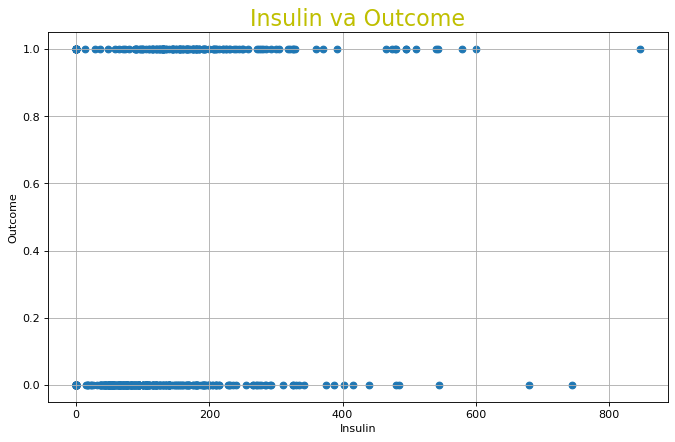

In [23]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['Insulin'], df['Outcome'])
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.grid()
plt.title('Insulin va Outcome', fontsize=20, color='y')
plt.show()

In [24]:
df_N5 = df[df['Insulin'] == 0]
print(len(df_N5))

141


In [25]:
df.drop(df[df['Insulin'] == 0].index, inplace=True)

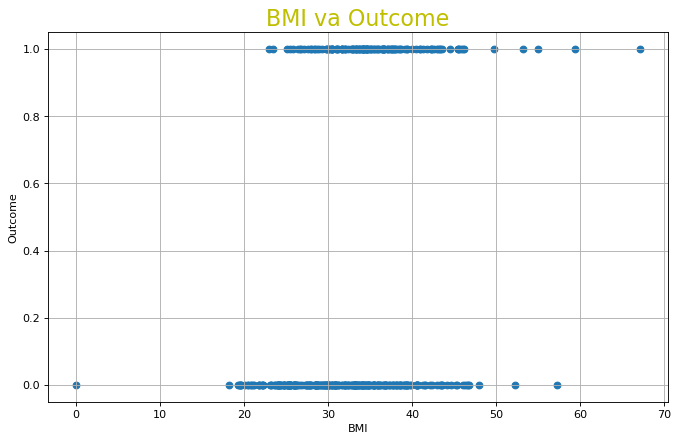

In [26]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['BMI'], df['Outcome'])
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.grid()
plt.title('BMI va Outcome', fontsize=20, color='y')
plt.show()

In [27]:
df_N4 = df[df['BMI']== 0]
df_N4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
371,118,64,23,89,0.0,1.731,21,0


In [28]:
df.nsmallest(10, columns='BMI')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
371,118,64,23,89,0.0,1.731,21,0
526,97,64,19,82,18.2,0.299,21,0
316,99,80,11,64,19.3,0.284,30,0
50,103,80,11,82,19.4,0.491,22,0
607,92,62,25,41,19.5,0.482,25,0
639,100,74,12,46,19.5,0.149,28,0
68,95,66,13,38,19.6,0.334,25,0
519,129,90,7,326,19.6,0.582,60,0
617,68,62,13,15,20.1,0.257,23,0
97,71,48,18,76,20.4,0.323,22,0


In [29]:
df.drop(df[df['BMI']== 0].index, inplace=True)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
8,197,70,45,543,30.5,0.158,53,1
13,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...
753,181,88,44,510,43.3,0.222,26,1
755,128,88,39,110,36.5,1.057,37,1
760,88,58,26,16,28.4,0.766,22,0
763,101,76,48,180,32.9,0.171,63,0


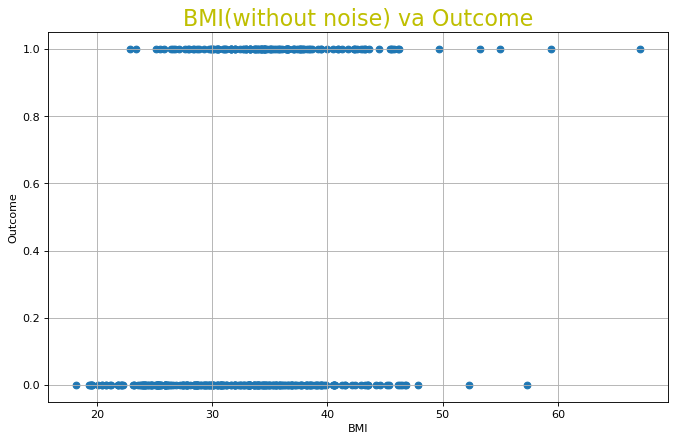

In [30]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['BMI'], df['Outcome'])
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.grid()
plt.title('BMI(without noise) va Outcome', fontsize=20, color='y')
plt.show()

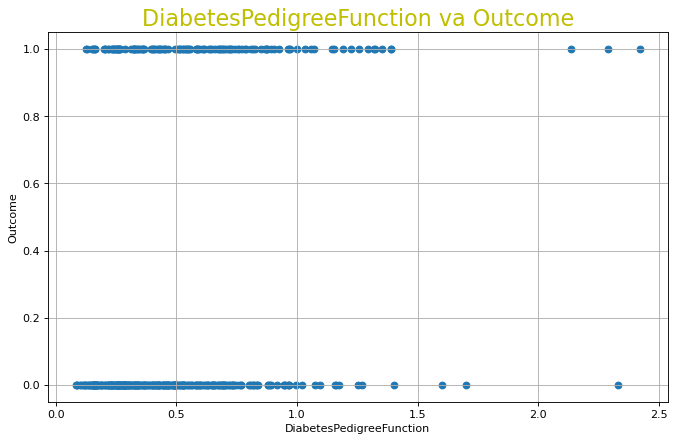

In [31]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['DiabetesPedigreeFunction'], df['Outcome'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome')
plt.grid()
plt.title('DiabetesPedigreeFunction va Outcome', fontsize=20, color='y')
plt.show()

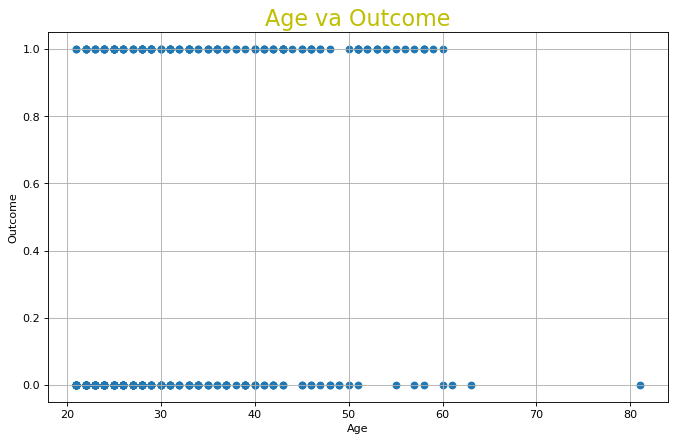

In [32]:
# Drawing plot
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(df['Age'], df['Outcome'])
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.grid()
plt.title('Age va Outcome', fontsize=20, color='y')
plt.show()

In [33]:
# geting describe
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [35]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,23,94,28.1,0.167,21,0
1,137,40,35,168,43.1,2.288,33,1
2,78,50,32,88,31.0,0.248,26,1
3,197,70,45,543,30.5,0.158,53,1
4,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...
387,181,88,44,510,43.3,0.222,26,1
388,128,88,39,110,36.5,1.057,37,1
389,88,58,26,16,28.4,0.766,22,0
390,101,76,48,180,32.9,0.171,63,0


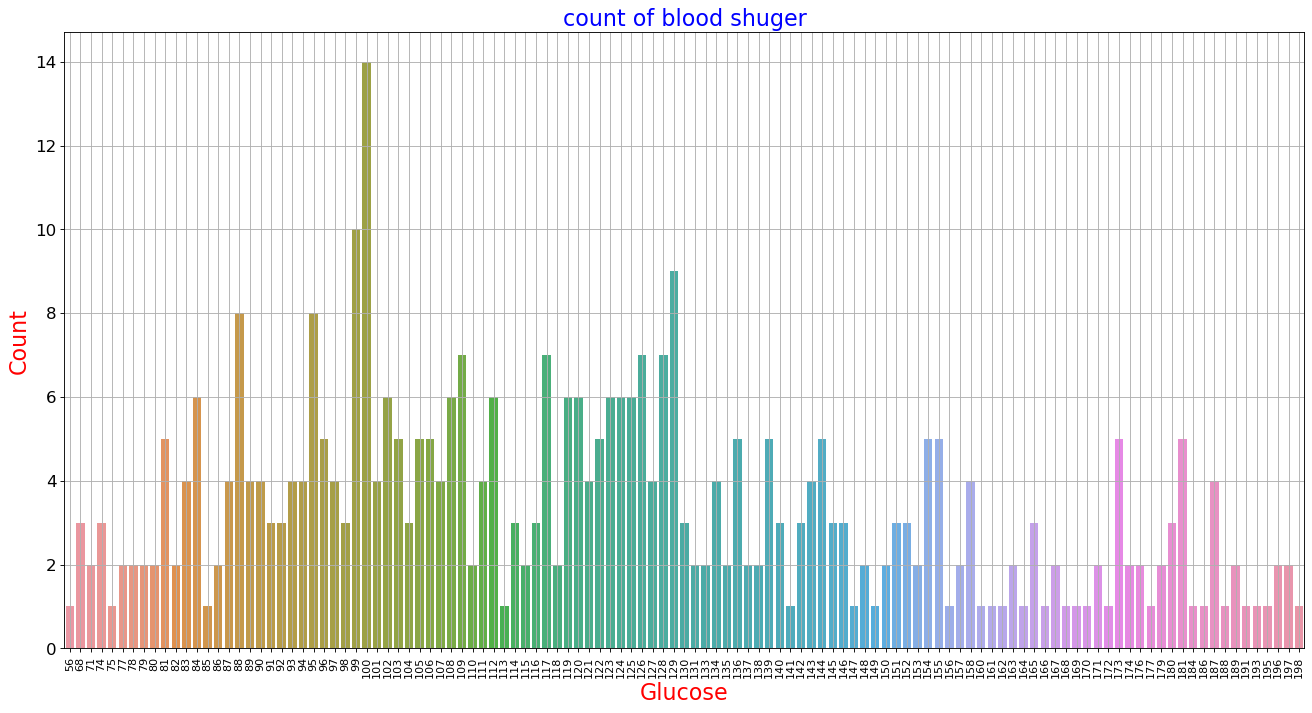

In [36]:
# Drawing plot
plt.figure(figsize=(20, 10), dpi= 80)
ax = sns.countplot(x= 'Glucose', data=df)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Glucose', fontsize=20, color='r')
plt.ylabel('Count', fontsize=20, color='r')
plt.title('count of blood shuger', fontsize=20, color='b')
plt.grid()
plt.show()

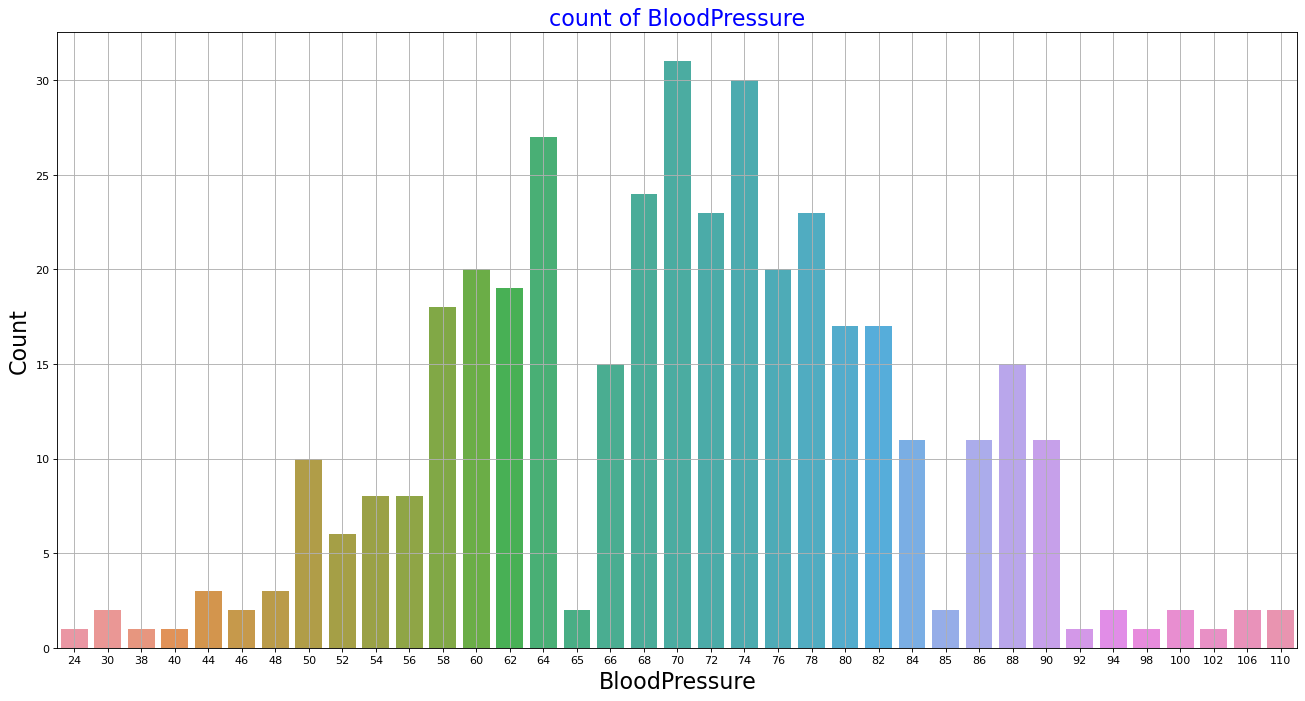

In [37]:
# Drawing plot
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x= 'BloodPressure', data= df)
plt.xlabel('BloodPressure', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('count of BloodPressure', fontsize=20, color='b')
plt.grid()
plt.show()


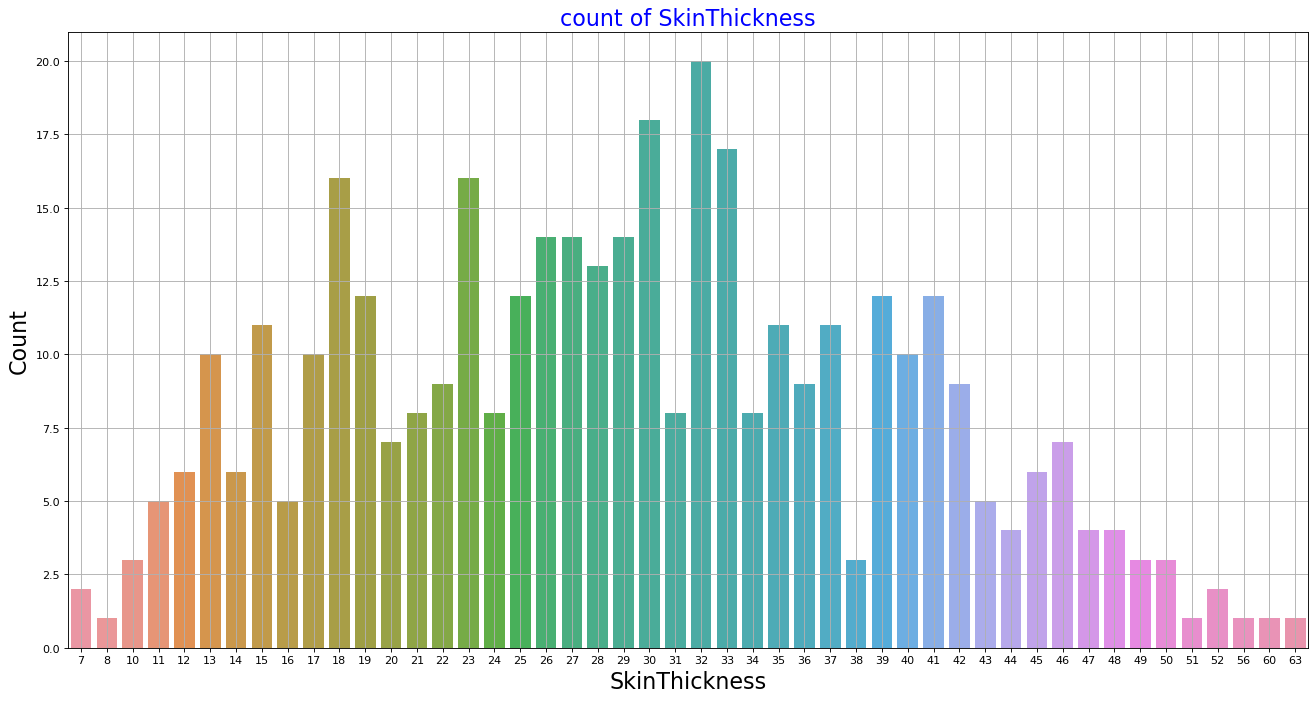

In [38]:
# Drawing plot
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x='SkinThickness', data= df)
plt.xlabel('SkinThickness', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('count of SkinThickness', fontsize=20, color='b')
plt.show()

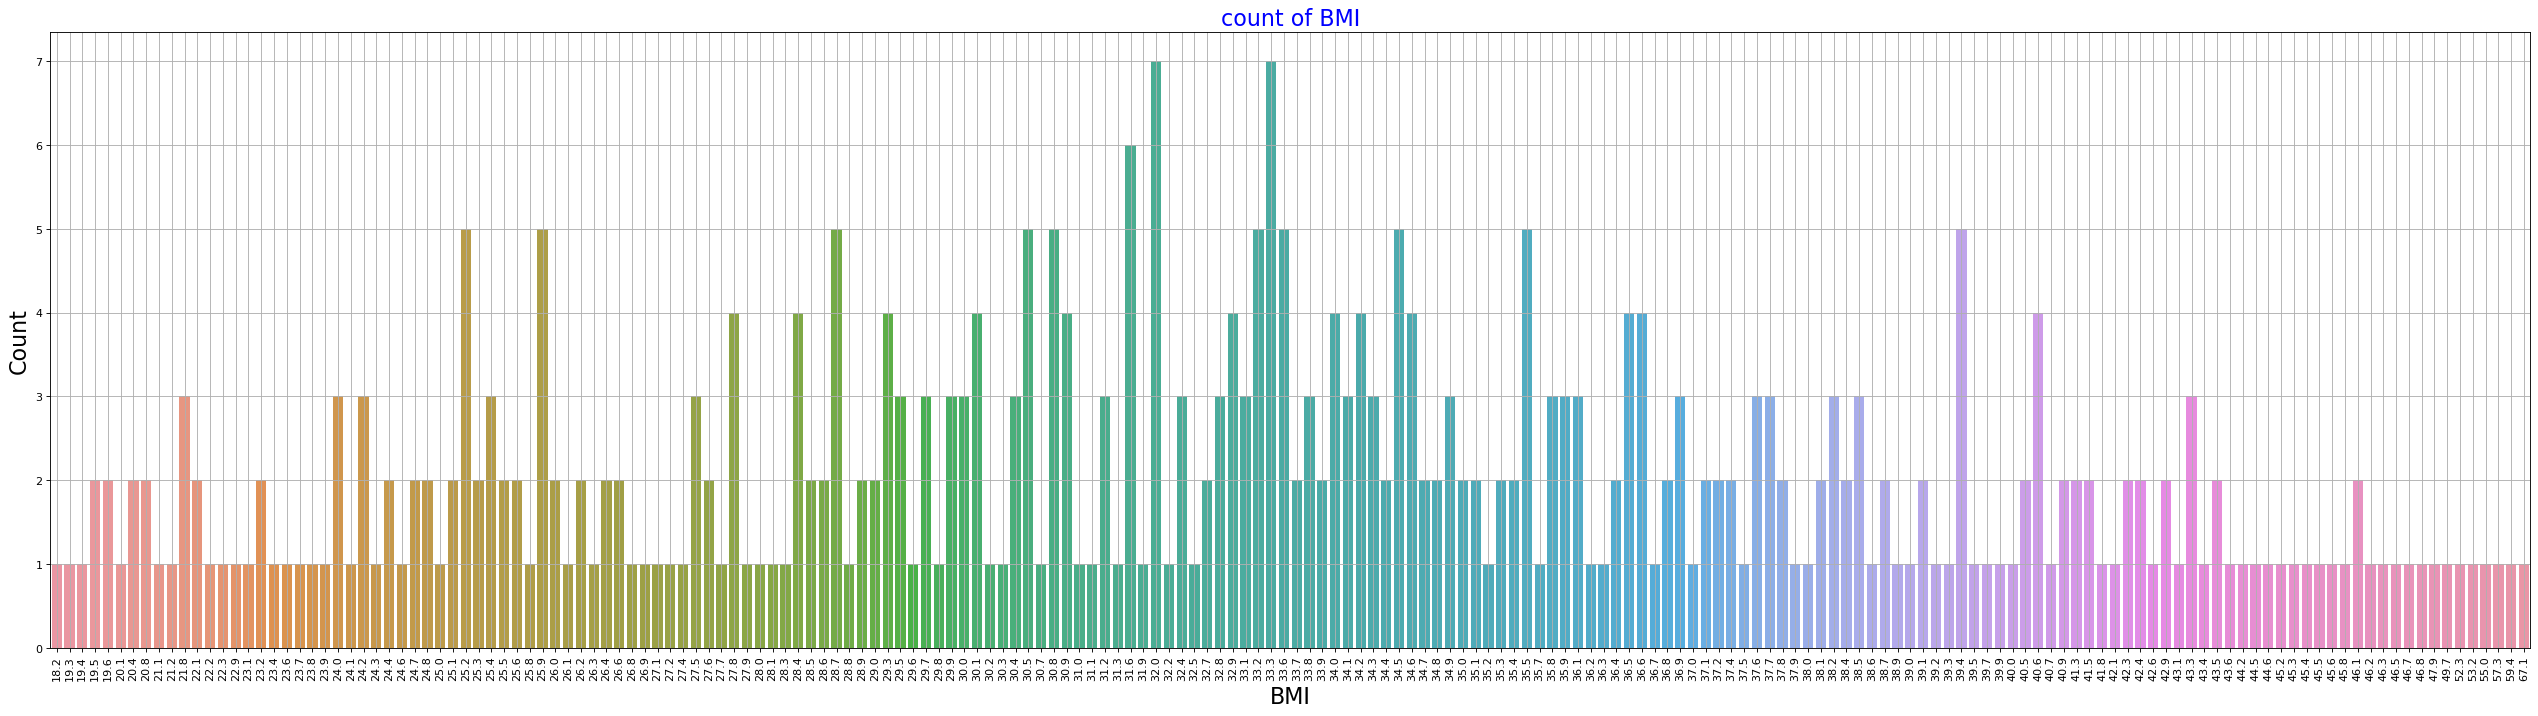

In [39]:
# Drawing plot
plt.figure(figsize=(40, 10), dpi=80)
ax = sns.countplot(x='BMI', data= df)
plt.xticks(rotation=90)
plt.xlabel('BMI', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('count of BMI',fontsize=20, color='b')
plt.show()

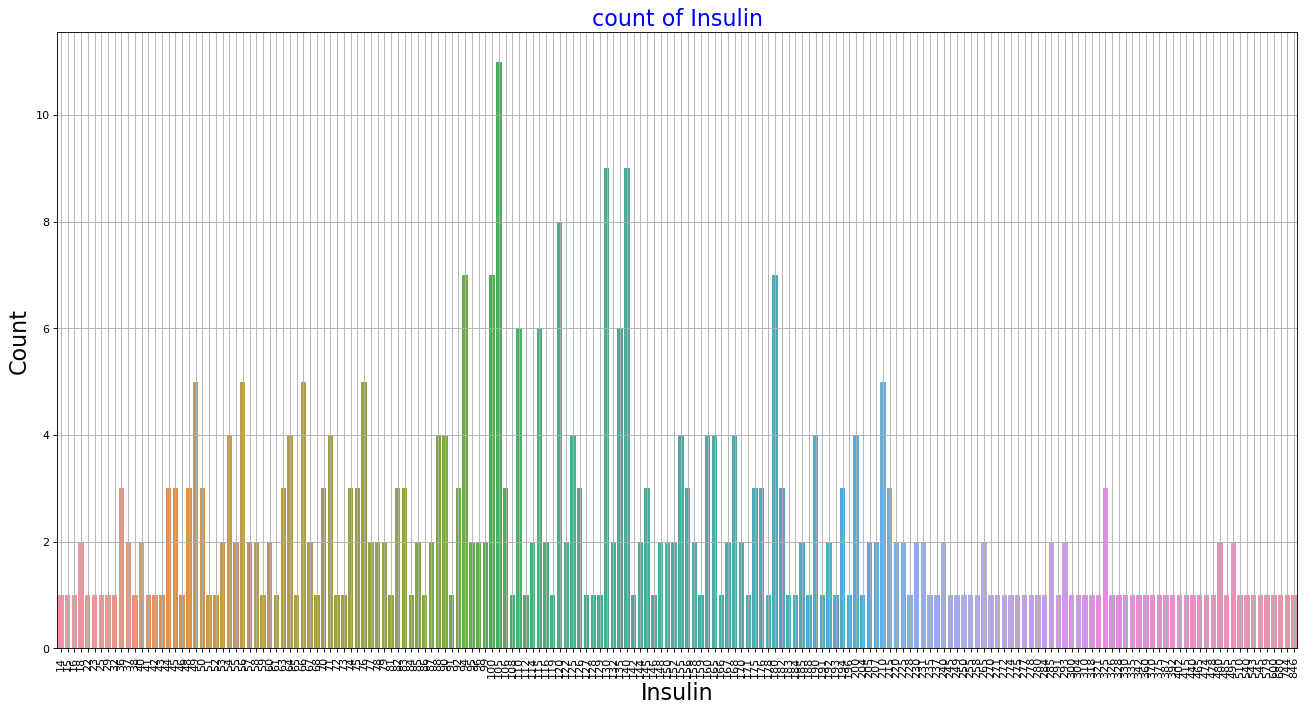

In [40]:
# Drawing plot
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x='Insulin', data= df)
plt.xticks(rotation=90)
plt.xlabel('Insulin', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('count of Insulin',fontsize=20, color='b')
plt.show()

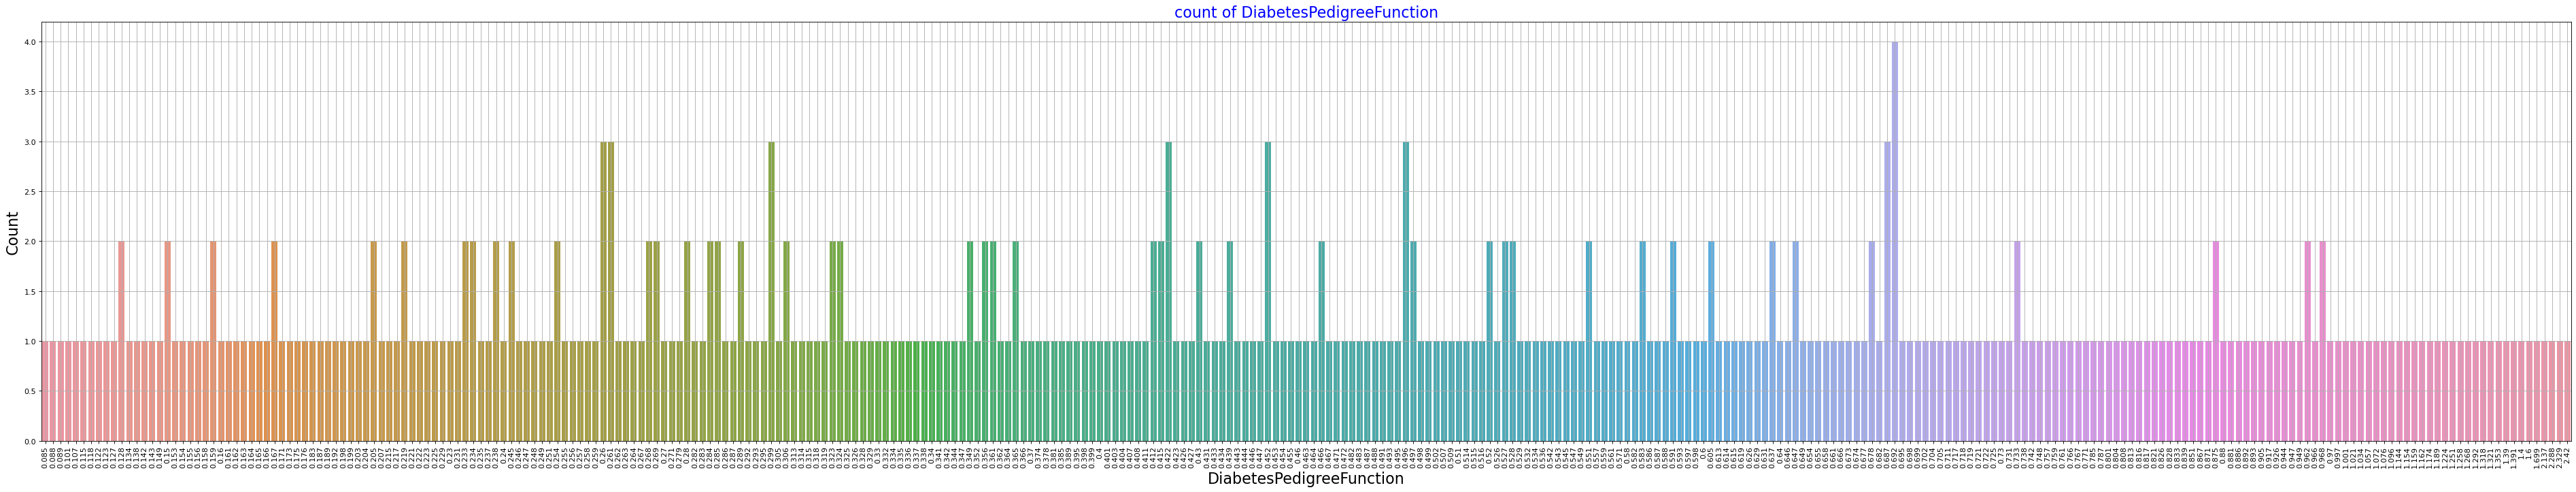

In [41]:
# Drawing plot
plt.figure(figsize=(60, 10), dpi=80)
ax = sns.countplot(x='DiabetesPedigreeFunction', data= df)
plt.xticks(rotation=90)
plt.xlabel('DiabetesPedigreeFunction', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('count of DiabetesPedigreeFunction',fontsize=20, color='b')
plt.show()

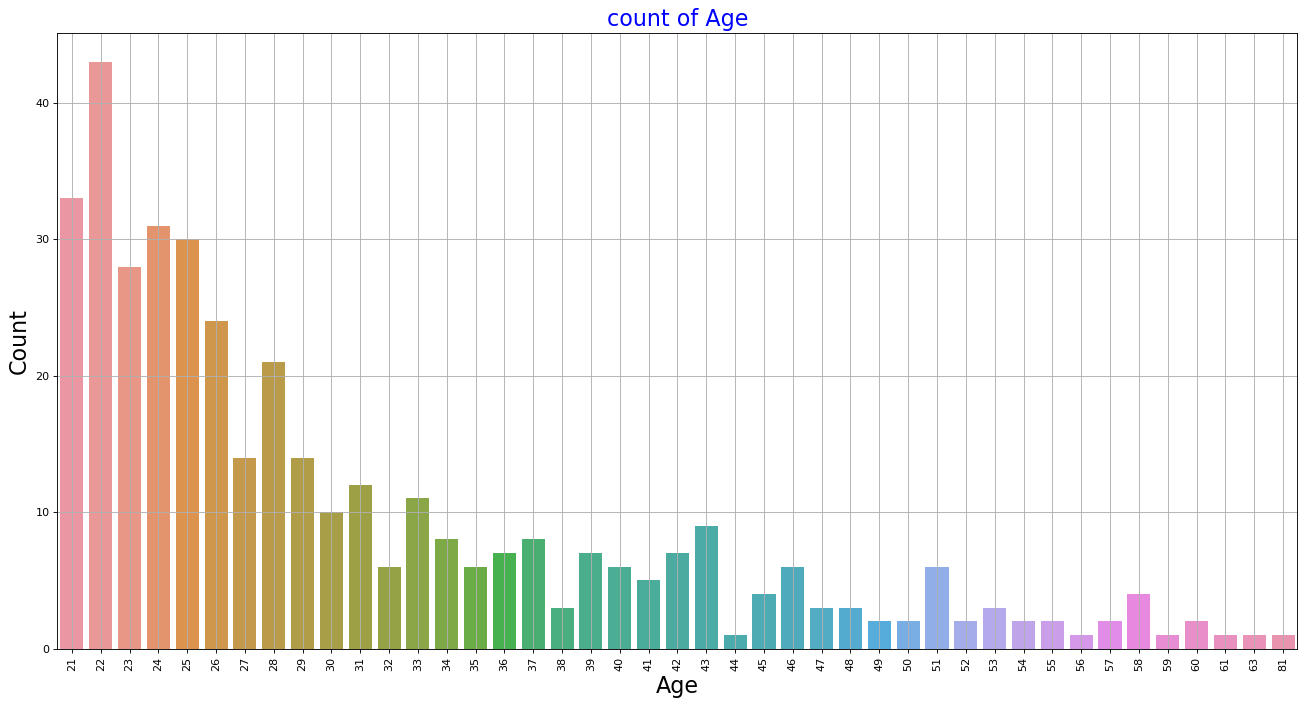

In [42]:
# Drawing plot

plt.figure(figsize=(20, 10), dpi=80)
ax = sns.countplot(x='Age', data= df)
plt.xticks(rotation=90)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.title('count of Age',fontsize=20, color='b')
plt.show()

In [43]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,23,94,28.1,0.167,21,0
1,137,40,35,168,43.1,2.288,33,1
2,78,50,32,88,31.0,0.248,26,1
3,197,70,45,543,30.5,0.158,53,1
4,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...
387,181,88,44,510,43.3,0.222,26,1
388,128,88,39,110,36.5,1.057,37,1
389,88,58,26,16,28.4,0.766,22,0
390,101,76,48,180,32.9,0.171,63,0


<h1>Normalize<h1>

In [44]:
# geting normalize
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome'])

# Separate independent variables from dependent variables

In [45]:
# creating X and Y
X = pd.DataFrame(df2.drop('Outcome', axis=1))
y = df2['Outcome'].values.reshape(-1, 1)


 # Create test and train data

In [46]:
# creating train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

# create the model

In [47]:
# creating model
model = GaussianNB()
model.fit(X_train, y_train.ravel())

GaussianNB()

# prediction

In [48]:
# prediction
y_pred = model.predict(X_test)

# import library

In [49]:
from sklearn import metrics

# Accuracy

In [50]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7974683544303798


0.7974683544303798

# import library

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
model.classes_

array([0., 1.])

In [53]:
confusion_matrix(y, model.predict(X))

array([[226,  36],
       [ 51,  79]])

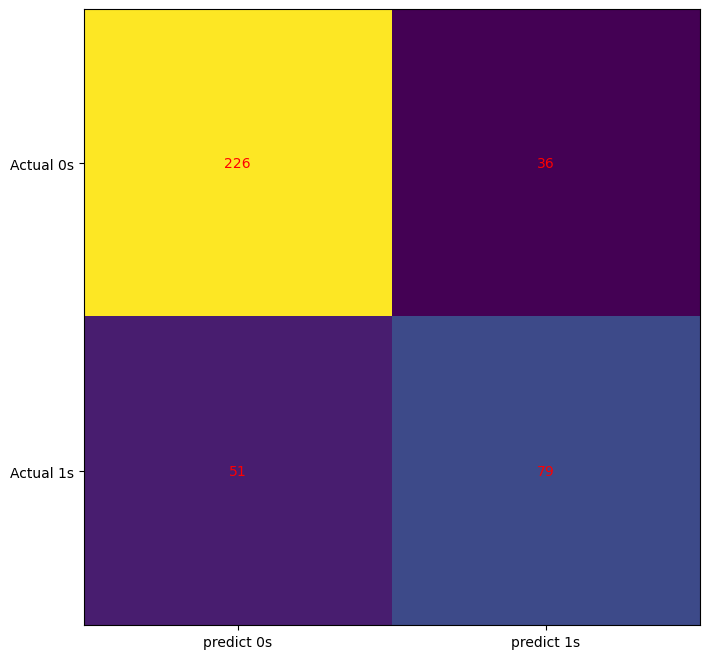

In [54]:
# Drawing plot

from calendar import c


cm = confusion_matrix(y, model.predict(X))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5) #! shekle moraba kamel
for i in range(2): #! 0 va 1 misaze 
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='r')


In [55]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       262
         1.0       0.69      0.61      0.64       130

    accuracy                           0.78       392
   macro avg       0.75      0.74      0.74       392
weighted avg       0.77      0.78      0.77       392



<h1>  Enter new  feature</h1>

In [56]:
# New numbers to peredict
new_f = model.predict([[60, 32, 43, 93, 29.7, 0.371, 60]])
new_f

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

<h1>how to improve the dataframe</h1>

In [57]:
kfold = KFold(5)
print(cross_val_score(model, X, y.ravel(), cv=kfold, n_jobs=1))

[0.78481013 0.64556962 0.80769231 0.82051282 0.80769231]


In [58]:
df3 = df2[df2.index < 78]
df4 = df2[df2.index > 157]
df5 = df3.append(df4)
df5.reset_index(drop=True, inplace=True)

/tmp/ipykernel_26/3807654303.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df3.append(df4)


In [59]:
df5

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000,0.0
1,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,1.0
2,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,1.0
3,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,1.0
4,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333,1.0
...,...,...,...,...,...,...,...,...
307,0.880282,0.744186,0.660714,0.596154,0.513292,0.058672,0.083333,1.0
308,0.507042,0.744186,0.571429,0.115385,0.374233,0.416274,0.266667,1.0
309,0.225352,0.395349,0.339286,0.002404,0.208589,0.291649,0.016667,0.0
310,0.316901,0.604651,0.732143,0.199519,0.300613,0.036831,0.700000,0.0


In [60]:
391 / 5 


78.2

In [61]:
391 / 5 * 2

156.4

In [62]:
# normalized
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normal = scaler.fit_transform(df5)
df_normal = pd.DataFrame(normal, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [63]:
# create X and Y
X = pd.DataFrame(df_normal.drop('Outcome', axis=1))
y = df_normal.Outcome.values.reshape(-1, 1)

In [64]:
# creat test and train
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [65]:
# create model
model = GaussianNB()

In [66]:
model.fit(X_train, y_train.ravel())

GaussianNB()

In [67]:
y_pred = model.predict(X_test)

In [68]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7936507936507936


In [69]:
kfold = KFold(5)
print(cross_val_score(model, X, y.ravel(), cv=kfold, n_jobs=1))

[0.76190476 0.79365079 0.74193548 0.85483871 0.77419355]


[0.78481013 0.64556962 0.80769231 0.82051282 0.80769231]

In [70]:
print(confusion_matrix(y, model.predict(X)))

[[184  32]
 [ 31  65]]


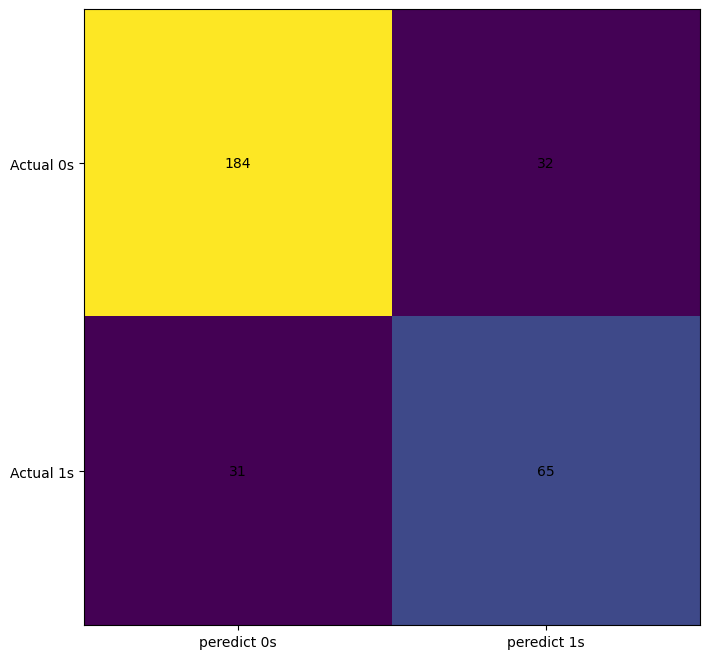

In [71]:
# Drawing plot
cm = confusion_matrix(y, model.predict(X))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('peredict 0s', 'peredict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

In [72]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       216
         1.0       0.67      0.68      0.67        96

    accuracy                           0.80       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.80      0.80      0.80       312



In [73]:
# peredict new data
new_feature = model.predict([[60, 32, 43, 93, 29.7, 0.371, 60]])
new_feature

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])